## ALGORITMOS DE APRENDIZAJE NO SUPERVISADOS 

# Oscar Rocha Gomez

# Agrupamiento en K-means

In [244]:
#Importamos las librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import warnings
import plotly.graph_objs as go
import plotly.express as px
## librerías de para implementar modelo Kmeans
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
# librerías de para evaluar el modelo
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

#Librería para evitar la advertencia de que el modelo de KMeans tiene una pérdida de memoria en Windows 
import warnings
warnings.filterwarnings('ignore')

## 1 Análisis Exploratorio del Dataset, identificar relaciones entre las variables, valores atipicos, tendencias, etc 

In [246]:
#Cargamos el dataset y mostramos las 40 primeras filas
dataset = pd.read_csv("C:\\Users\\Oscar Rocha Gomez\\Documents\\UNAD\\16-04-II-2024\\ANALISIS DE DATOS\\Mall_Customers.csv")
dataset.head(40)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


## Tamaño de nuestra base de Datos 

In [248]:
dataset.shape

(200, 5)

In [250]:
data=dataset.drop(['Spending Score (1-100)'], axis=1)

In [252]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$)
0,1,Male,19,15
1,2,Male,21,15
2,3,Female,20,16
3,4,Female,23,16
4,5,Female,31,17


In [254]:
data.describe()

,CustomerID,Age,Annual Income (k$)
count,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000
std,57.879185,13.969007,26.264721
min,1.000000,18.000000,15.000000
25%,50.750000,28.750000,41.500000
50%,100.500000,36.000000,61.500000
75%,150.250000,49.000000,78.000000
max,200.000000,70.000000,137.000000


# Datos faltantes o atipicos


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

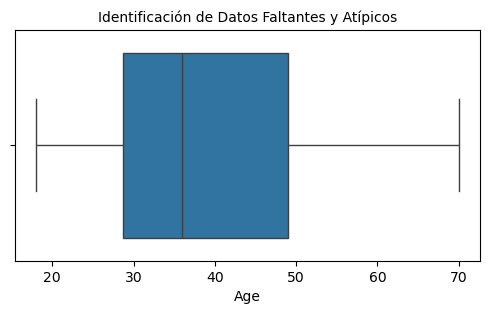

In [256]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=data['Age'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

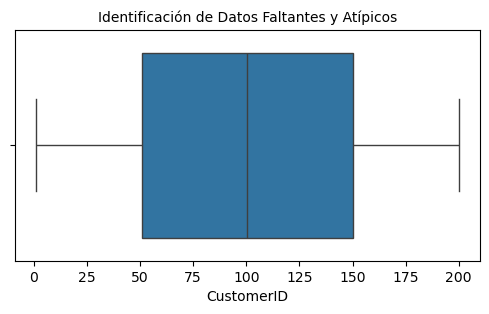

In [258]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=data['CustomerID'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

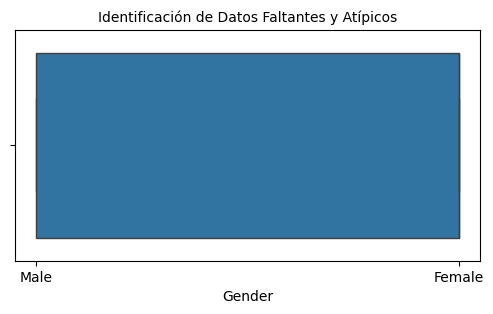

In [260]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=data['Gender'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

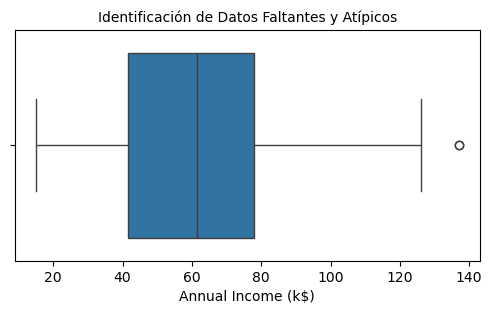

In [262]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=data['Annual Income (k$)'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

## 2 Procesar los datos, tratando los valores faltantes y transformandolos segun sea necesario

In [264]:
#Revisión de datos faltantes

print("Cantidad de Registros con cero en Edad: ",data['Age'].isin([0]).sum())
print("Cantidad de Registros con cero en ingresos ",data['Annual Income (k$)'].isin([0]).sum())


Cantidad de Registros con cero en Edad:  0
Cantidad de Registros con cero en ingresos  0


In [266]:
# Reemplazar todos los ceros con el valor medio (promedio) de la columna.

data['Annual Income (k$)']=data['Age'].replace(0,data['Annual Income (k$)'].mean())

In [268]:
#Conteo de Datos Atípicos

nivel_minimo=0
nivel_maximo=100
Total_Atipicos=((data['Annual Income (k$)']<nivel_minimo)|(data['Annual Income (k$)']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [274]:
data.isna().sum()

CustomerID            0
Gender                0
Age                   0
Annual Income (k$)    0
dtype: int64

In [276]:

data.dropna()

,CustomerID,Gender,Age,Annual Income (k$)
0,1,Male,19,19
1,2,Male,21,21
2,3,Female,20,20
3,4,Female,23,23
4,5,Female,31,31
...,...,...,...,...
195,196,Female,35,35
196,197,Female,45,45
197,198,Male,32,32
198,199,Male,32,32


## 3 Seleccionar las caracteristicas m{as relevantes para entrenar el Modelo utilizando la selección de Caracteristicas 

# Caracteristicas de interes para el agrupamiento
# · Edad
# . Ingresos 


In [328]:
# Filtrar columnas del modelo 

Datos = data[["Age","Annual Income (k$)",]]

In [332]:
# Revisión de los datos de las variables objetivo

data.head(10)

,CustomerID,Gender,Age,Annual Income (k$)
0,1,0,19,19
1,2,0,21,21
2,3,1,20,20
3,4,1,23,23
4,5,1,31,31
5,6,1,22,22
6,7,1,35,35
7,8,1,23,23
8,9,0,64,64
9,10,1,30,30


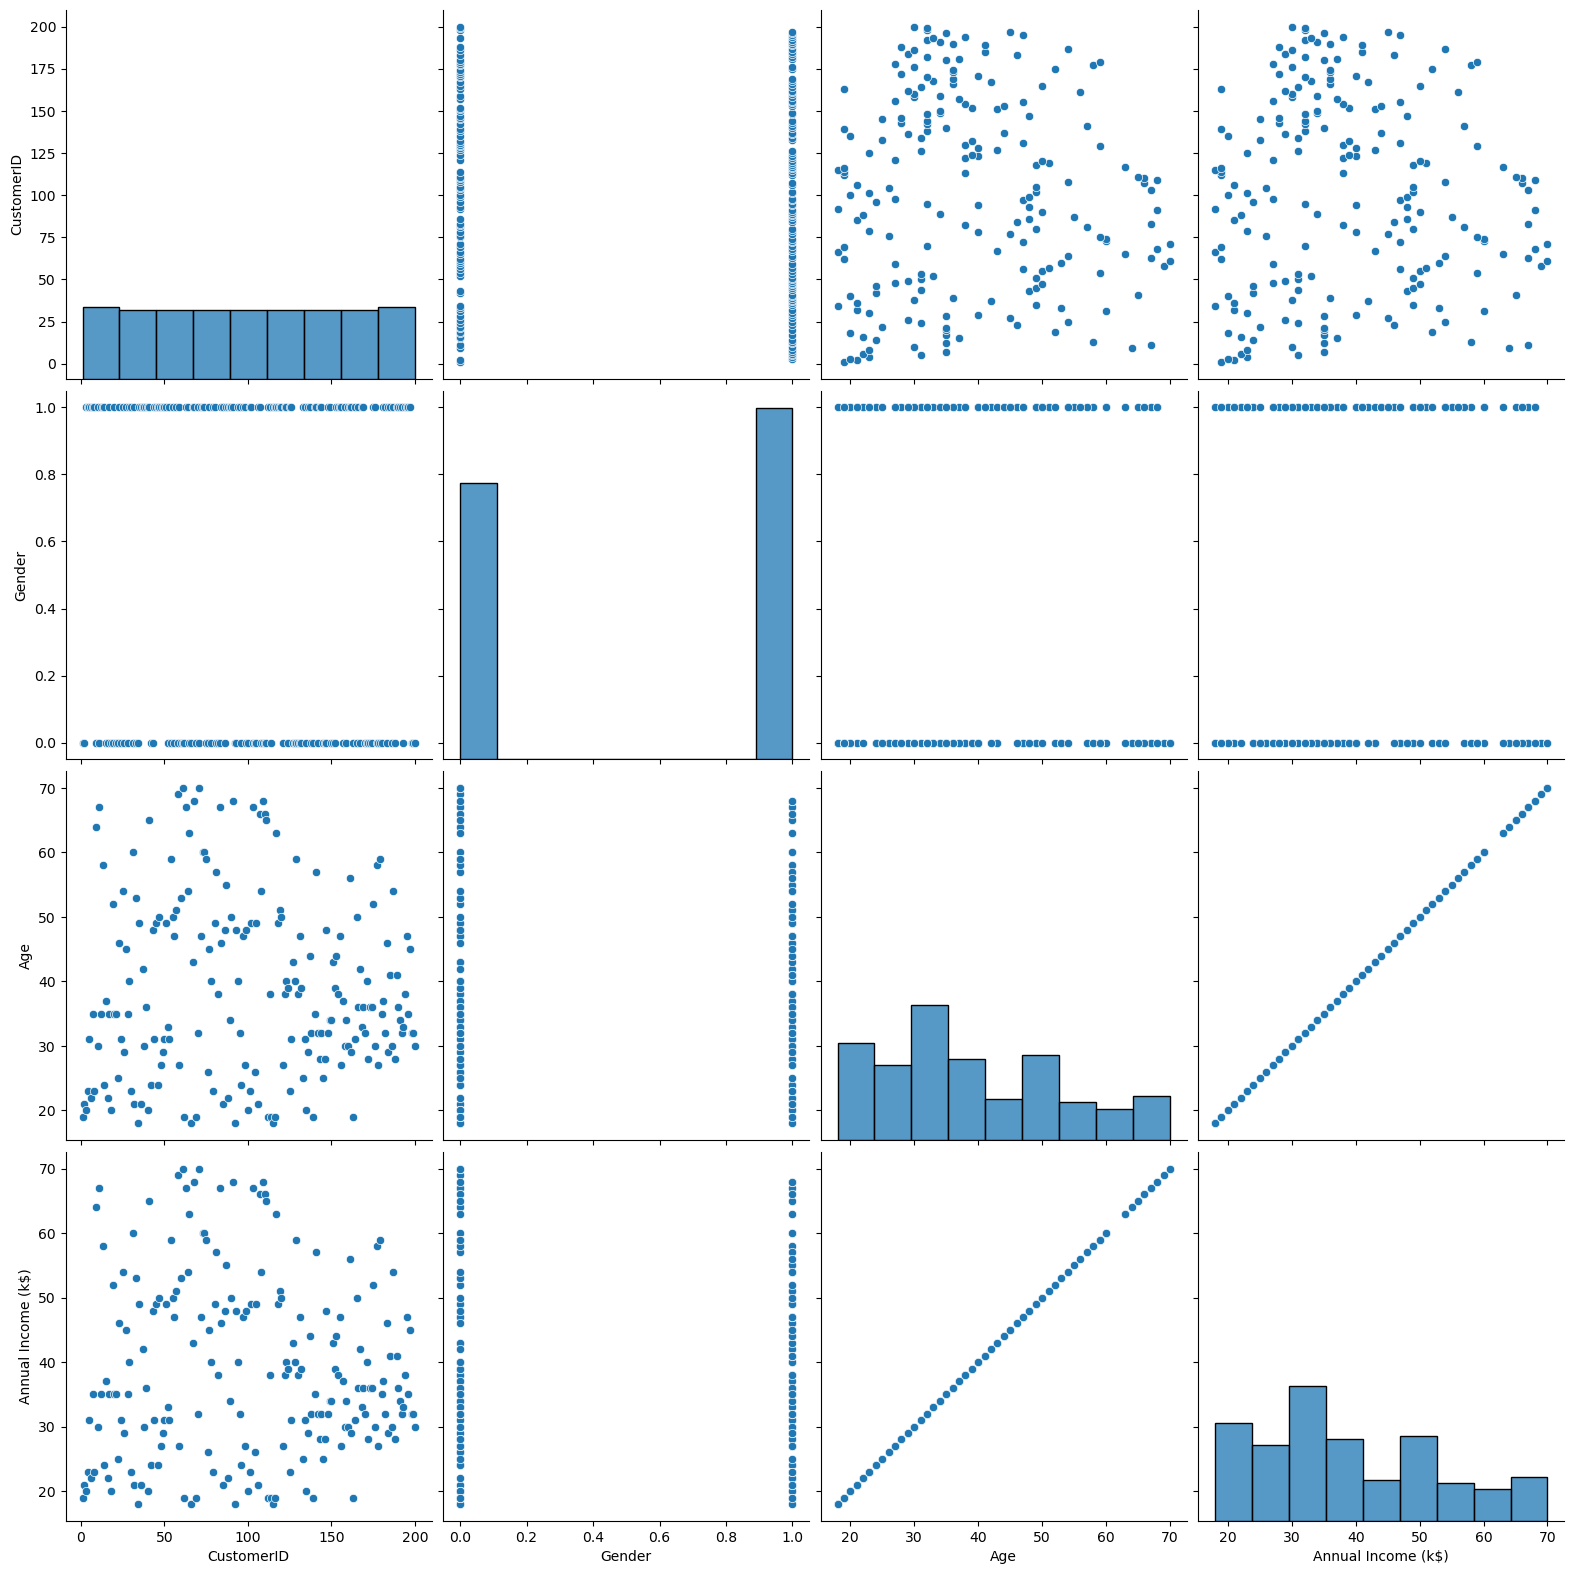

In [330]:
sns.pairplot(data.dropna(), size=4,kind='scatter')

In [280]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [286]:
data['Gender'] =data['Gender'].map({'Male':0,'Female':1})

In [288]:
data['Gender'].unique()

array([0, 1], dtype=int64)

In [334]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$)
0,1,0,19,19
1,2,0,21,21
2,3,1,20,20
3,4,1,23,23
4,5,1,31,31


In [336]:
# Matriz de correlación
corr_matrix = data.corr()
corr_matrix

,CustomerID,Gender,Age,Annual Income (k$)
CustomerID,1.000000,-0.057400,-0.026763,-0.026763
Gender,-0.057400,1.000000,-0.060867,-0.060867
Age,-0.026763,-0.060867,1.000000,1.000000
Annual Income (k$),-0.026763,-0.060867,1.000000,1.000000


<Axes: >

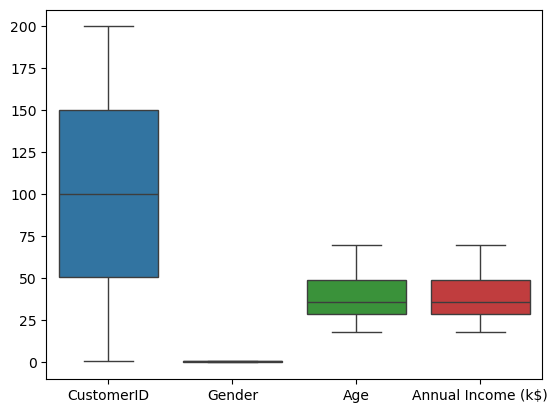

In [294]:
## Diagramas de caja para cada variable
sns.boxplot(data=data)

# Estandarizar los datos antes de aplicar K-Means

In [296]:

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)
X

,CustomerID,Gender,Age,Annual Income (k$)
0,-1.723412,-1.128152,-1.424569,-1.424569
1,-1.706091,-1.128152,-1.281035,-1.281035
2,-1.688771,0.886405,-1.352802,-1.352802
3,-1.671450,0.886405,-1.137502,-1.137502
4,-1.654129,0.886405,-0.563369,-0.563369
...,...,...,...,...
195,1.654129,0.886405,-0.276302,-0.276302
196,1.671450,0.886405,0.441365,0.441365
197,1.688771,-1.128152,-0.491602,-0.491602
198,1.706091,-1.128152,-0.491602,-0.491602


## 4 Entrenar el Modelo  Aplicamos el Algoritmo K- MEANS

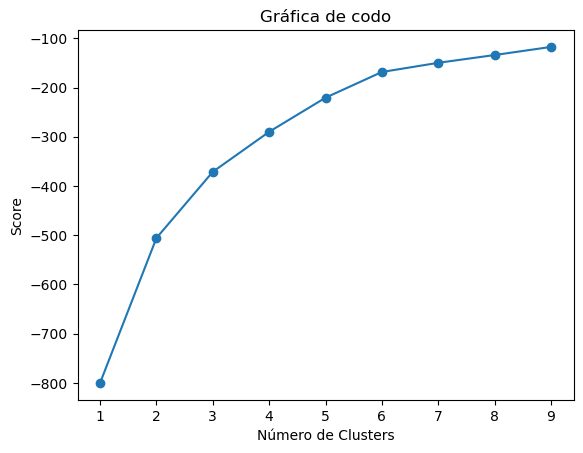

In [316]:
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Gráfica de codo')
plt.show()

In [340]:
# Generación del modelo de Agrupamiento del modelo con K=3 (Es decir haremos 3 grupos de agrupamiento) 
kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_
centroids

array([[-0.24184385, -0.04570339,  1.19116638,  1.19116638],
       [ 0.23778012, -1.12815215, -0.63387614, -0.63387614],
       [ 0.03486935,  0.88640526, -0.5747001 , -0.5747001 ]])

# Obtenemos las etiquetas de cada punto de nuestros datos

# 5 Diferentes gráficas que permitan visualizar los resultados del modelo 

In [310]:

labels = kmeans.labels_
# Obtenemos los centroids
C = kmeans.cluster_centers_
colores=['red','green','blue']
asignar=[]
for row in labels:
    asignar.append(colores[row]) 

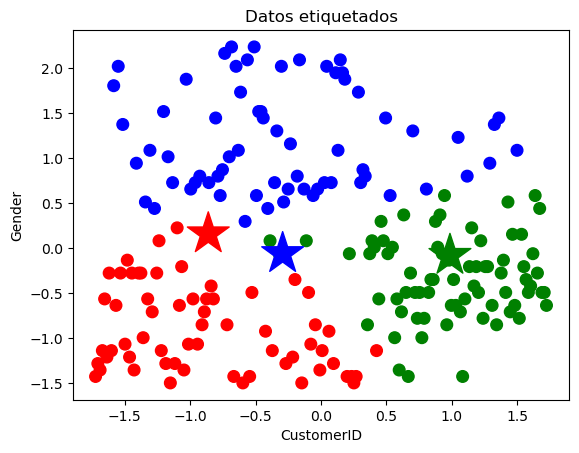

In [359]:
f1 = X['CustomerID'].values
f2 = X['Annual Income (k$)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('CustomerID')
plt.ylabel('Gender')
plt.show()

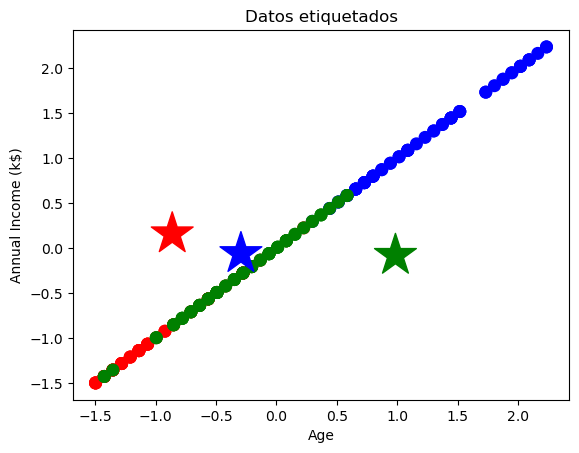

In [361]:
f1 = X['Age'].values
f2 = X['Annual Income (k$)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()

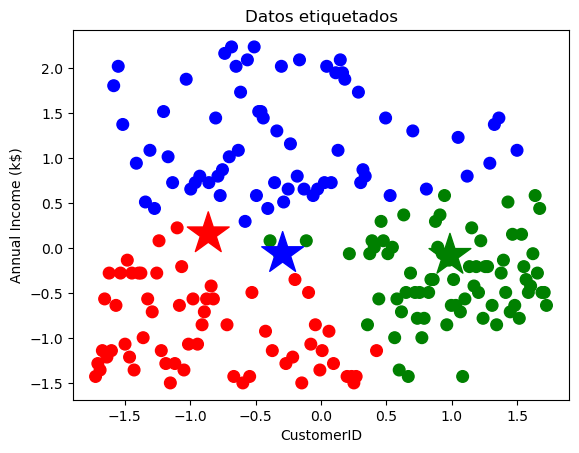

In [363]:
f1 = X['CustomerID'].values
f2 = X['Annual Income (k$)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('CustomerID')
plt.ylabel('Annual Income (k$)')
plt.show()

In [365]:
X_new = scaler.fit_transform(np.array([[5.4,3.3,1.2,0.25]]))  
new_label = kmeans.predict(X_new)
color=[]
for row in new_label:
    color.append(colores[row])    
print(new_label)
print(color)

[2]
['blue']


# Calcular medidas de calidad para K-Means

In [371]:
print("Medidas de calidad para K-Means:")
print("Puntaje de silueta:", metrics.silhouette_score(X, labels))
print("Índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(X, labels))
print("Inertia (suma de cuadrados dentro de los clusters):", kmeans.inertia_)
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(X, labels))

Medidas de calidad para K-Means:
Puntaje de silueta: 0.32818498721670464
Índice de Calinski-Harabasz: 113.76041506541112
Inertia (suma de cuadrados dentro de los clusters): 374.22919773760816
Davies-Bouldin Index: 1.1961584964479712


# Hierarchical Clustering

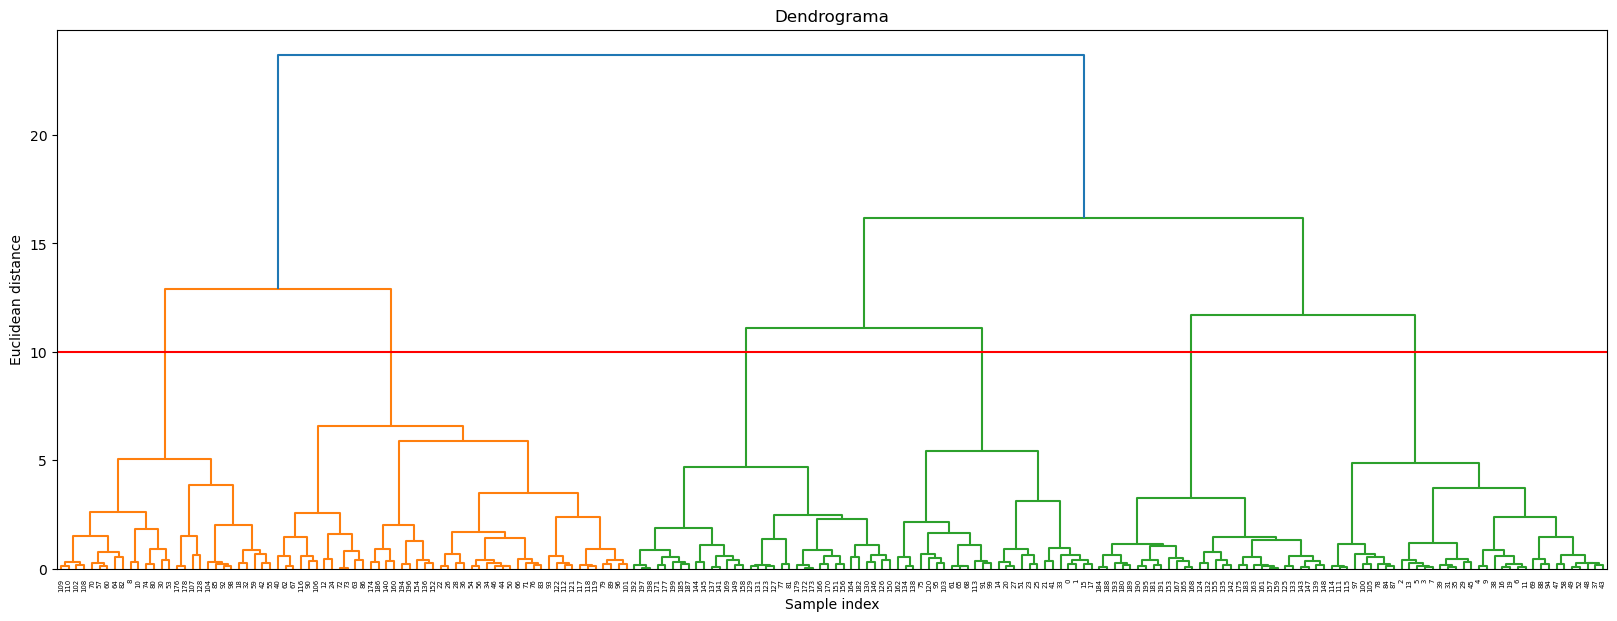

In [373]:
ward_clustering = linkage(X, method="ward", metric="euclidean")
plt.figure(figsize=(20, 7))
dendrogram(ward_clustering)
plt.axhline(y = 10, color = 'r', linestyle = '-')
plt.title('Dendrograma')
plt.xlabel('Sample index')
plt.ylabel('Euclidean distance')
plt.show()

In [375]:
hier_clustering = AgglomerativeClustering(n_clusters=3)
labels_hier = hier_clustering.fit_predict(X)
labels_hier

array([2, 2, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2,
       0, 2, 0, 2, 0, 2, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 1, 1, 0, 2, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 2, 1, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 1, 0, 0, 0, 0, 0, 2, 0, 2, 1, 0, 0, 2, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 0, 1, 2, 0, 1, 0, 2, 1, 0, 0, 2, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 2, 1, 1, 0, 0, 0, 0, 2, 0, 0, 2, 1, 1, 2, 2, 0, 2, 2, 2,
       1, 1, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 0, 1,
       0, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 0, 1,
       0, 2, 0, 2, 1, 1, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 2, 1, 0, 1, 0, 2,
       2, 2], dtype=int64)

# 6 Obtenemos las etiquetas de cada punto de nuestros datos

In [377]:
labels = labels_hier
colores=['red','green','cyan']
asignar=[]
for row in labels:
    asignar.append(colores[row])

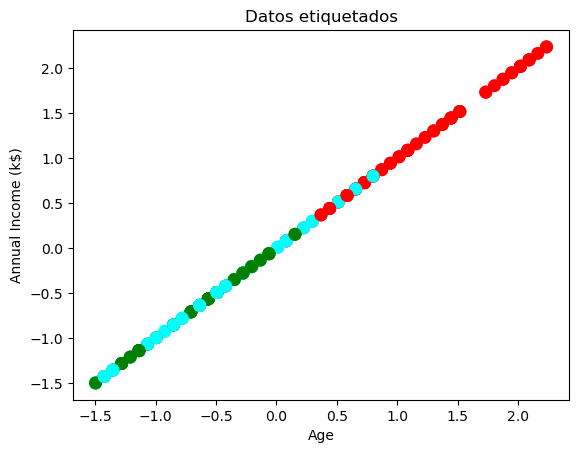

In [379]:
f1 = X['Age'].values
f2 = X['Annual Income (k$)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.title('Datos etiquetados')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()

# Método silhouette para identificar el número óptimo de clusters

range_n_clusters = range(4, 50)
valores_medios_silhouette = []
for n_clusters in range_n_clusters:
    modelo = AgglomerativeClustering(
                    affinity   = 'euclidean',
                    linkage    = 'ward',
                    n_clusters = n_clusters
             )
    cluster_labels = modelo.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette');

# Calcular medidas de calidad para Clustering Jerárquico

In [381]:
print("\nMedidas de calidad para Clustering Jerárquico:")
print("Puntaje de silueta:", metrics.silhouette_score(X, labels_hier))
print("Índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(X, labels_hier))
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(X, labels_hier))


Medidas de calidad para Clustering Jerárquico:
Puntaje de silueta: 0.33122971067043155
Índice de Calinski-Harabasz: 103.82221676715452
Davies-Bouldin Index: 1.146752328906264


In [404]:
# Calcular el coeficiente de correlación cofenética
from scipy.cluster.hierarchy import linkage
# Compute the distances
X_dist = pdist(X)
# Compute the linkage matrix
Z = linkage(X, 'ward')
# Calculate the cophenetic correlation coefficient
coef_cofenetico = cophenet(Z, X_dist)
print("Coeficiente de correlación cofenética:", coef_cofenetico)

Coeficiente de correlación cofenética: (0.6604015353184769, array([ 0.20372449, 16.14623136, 16.14623136, ...,  0.01732072,
        0.83475654,  0.83475654]))


## 7 Interpretar, análizar y documentar los resultados obtenidos 